In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0) 
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [19]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


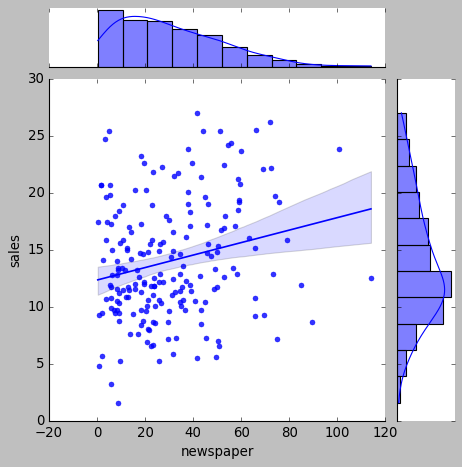

In [21]:
#EDA
plt.style.use("classic")
sns.jointplot('newspaper','sales',data=data,kind='reg')
plt.show()

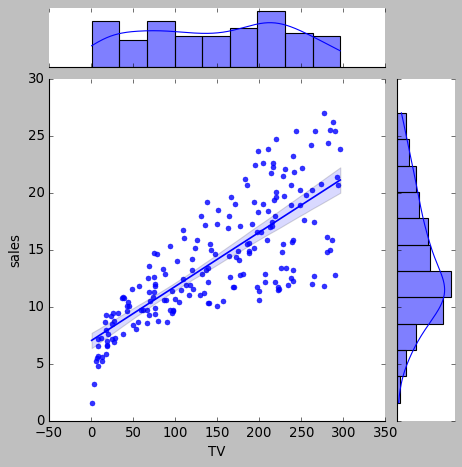

In [22]:
plt.style.use("classic")
sns.jointplot('TV','sales',data=data,kind='reg')
plt.show()

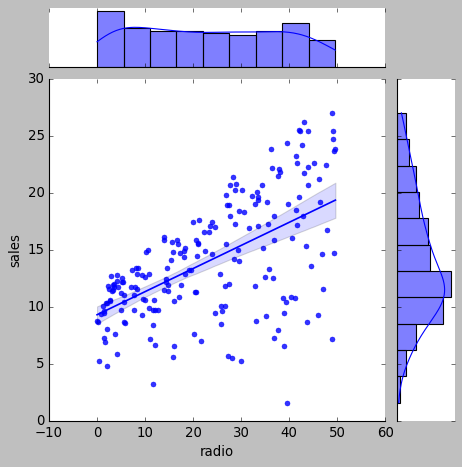

In [23]:
plt.style.use("classic")
sns.jointplot("radio","sales",data=data, kind="reg")
plt.show()

In [24]:
#Out of all indeoendant variables, it is observed that TV is showind more linear in positive direction

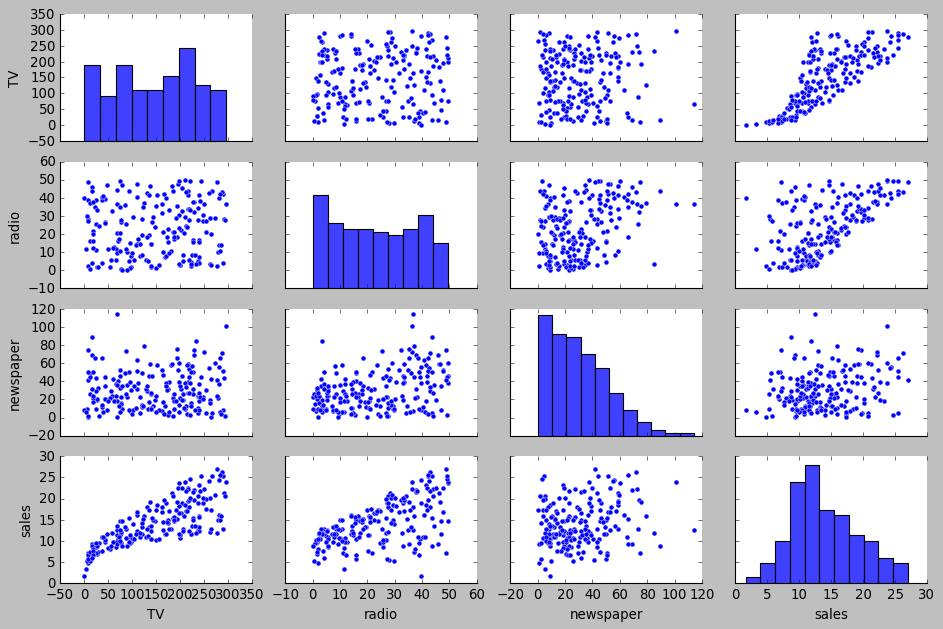

In [25]:
sns.pairplot(data, size = 2, aspect=1.5)
plt.show()

<AxesSubplot:>

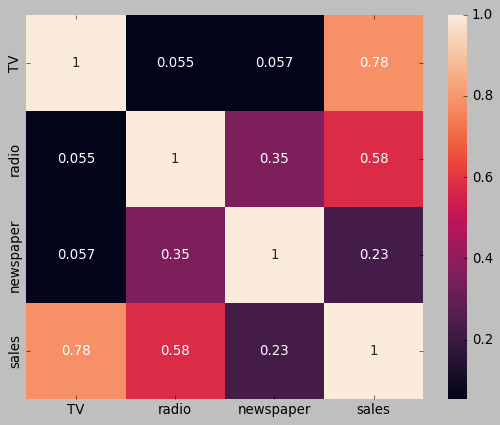

In [26]:
#heatmap
sns.heatmap(data.corr(), annot=True)

In [27]:
'''
1. String relation between TV and sales
2. weak relationship between radio and sales
3. very weak relation between newspaper and sales 
'''

'\n1. String relation between TV and sales\n2. weak relationship between radio and sales\n3. very weak relation between newspaper and sales \n'

In [28]:
feature_cols = ['TV', 'newspaper', 'radio']
X = data[feature_cols]
X.head()

,TV,newspaper,radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8


In [30]:
y = data.sales

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [59]:
print('X Train share:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X Train share: (150, 2)
X test shape: (50, 2)
y train shape: (150,)
y test shape: (50,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[feature_cols] = sc.fit_transform(X_train[feature_cols])
X_test[feature_cols] = sc.transform(X_test[feature_cols])

In [61]:
X_train.describe()

,TV,radio
count,1.500000e+02,1.500000e+02
mean,-9.843977e-17,2.220446e-17
std,1.003350e+00,1.003350e+00
min,-1.638504e+00,-1.528858e+00
25%,-8.607188e-01,-9.140004e-01
50%,-4.281164e-02,-1.485355e-02
75%,8.579179e-01,8.991689e-01
max,1.751196e+00,1.737161e+00


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred_train = lr.predict(X_train)

In [65]:
y_pred_test = lr.predict(X_test)

In [66]:
y_pred_train

array([24.09183217, 14.93279935,  6.7301962 , 19.80732189, 18.92841085,
       12.45638086, 14.08821856,  6.08527135, 15.30178509,  9.6236894 ,
       12.00515131, 12.04604747,  8.59615976, 21.62835925, 23.21584784,
       12.19235973,  6.66474505, 17.76043317, 16.37792668,  8.85222902,
       20.38764448, 20.66755952, 24.12079297, 10.15801165, 10.57377188,
       16.42738753, 10.39577671,  6.63259982, 21.23281971, 14.36776113,
       15.5020463 , 10.07371168, 14.84531495, 13.80099266,  8.40245364,
        8.84793044, 10.11433929,  8.24678189, 17.03279892, 15.163848  ,
       16.78306277, 23.30106819, 13.40728731,  9.80874099, 18.10304809,
       14.80010612,  5.37781123, 12.86082183, 11.99966383, 12.0614466 ,
       11.63236505, 14.91464892,  4.53183365, 16.35734434, 12.04494085,
       17.74985887, 15.26451404, 18.52691069, 11.54956253, 13.9054343 ,
       20.4990245 ,  5.21999018, 13.70643775,  7.82776904, 21.14671473,
       13.50673526, 11.6623036 , 10.1345708 ,  8.90114524, 16.88

In [67]:
y_pred_test

array([21.73751851, 16.40451622,  7.64073276, 17.81512707, 18.6140367 ,
       23.75320401, 16.26267467, 13.30968011,  9.11623605, 17.24121988,
       14.37997584,  9.86630093, 17.28107008, 16.70455883, 14.93571851,
       15.47067849, 12.39847009, 17.21737409, 11.18626133, 18.09114847,
        9.34543641, 12.71804909,  8.75327159, 10.468843  , 11.34116649,
       14.98646893,  9.77329331, 19.43186663, 18.31005062, 17.14215851,
       21.62609193, 14.47149683, 16.3536012 , 12.27215653, 19.97488243,
       15.34878155, 13.90760851,  9.99030388, 20.98440888,  7.482353  ,
        3.61019982,  7.1944428 ,  5.99097416, 18.39958364,  8.35858094,
       14.12195436, 15.05074527, 20.38304162, 20.65191677, 19.47457534])

In [68]:
y = lr.coef_
c = lr.intercept_

In [42]:
print(y,c)

[3.72650688 0.02370631 2.94496827] 14.351333333333333


In [69]:
feature_cols.insert(0,'Intercept')

In [70]:
feature_cols

['Intercept', 'TV', 'radio']

In [71]:
coef = lr.coef_.tolist()

In [46]:
coef

[3.726506882883195, 0.02370630669221851, 2.944968273242895]

In [72]:
coef.insert(0, lr.intercept_)

In [48]:
coef

[14.351333333333333, 3.726506882883195, 0.02370630669221851, 2.944968273242895]

In [73]:
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 13.810666666666666
TV 4.06534784817705
radio 2.740422583902571


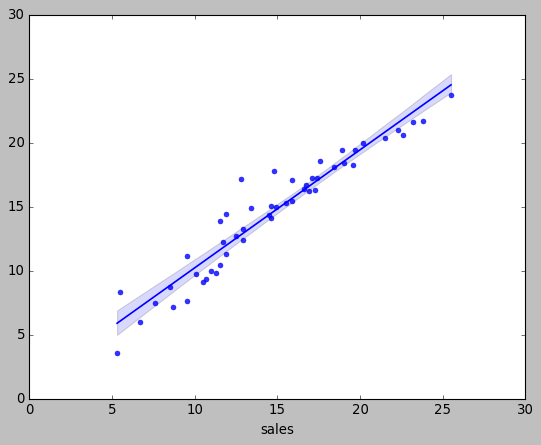

In [74]:
plt.style.use("classic")
sns.regplot(y_test,y_pred_test)
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

1.3441806809185026
1.0477590411212603


In [76]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [77]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train, RMSE_test)

1.7581895347643337 1.3879034699382884


In [78]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(r2_train, r2_test)

0.8901498098117536 0.9176214942248908


In [79]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [80]:
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8886552494010291
Adjusted R2 score for test set is 0.9141160258940351


In [81]:
##Feature selection
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40, random_state=1)

In [83]:
X_train

,TV,radio
155,187.8,21.1
91,134.3,4.9
82,239.8,4.1
123,224.0,2.4
192,75.5,10.8
...,...,...
134,219.8,33.5
138,273.7,28.9
73,26.8,33.0
141,73.4,17.0


In [84]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

In [86]:
y_pred_train

array([15.45200629, 10.04720156, 14.62370393, 13.60033666,  8.50944976,
        8.90046816, 10.26483853,  8.55002882, 17.01128198, 15.14321425,
       16.92203055, 23.21055474, 13.60929852,  9.7600786 , 18.16741717,
       14.73217447,  5.52026017, 12.77679776, 12.3086788 , 11.98304   ,
       11.99511326, 14.70193464,  4.68171493, 16.29950903, 12.41713495,
       17.72245105, 15.19241289, 18.27557422, 11.78912967, 13.85147006,
       20.44805161,  5.46020038, 13.81214193,  7.93975017, 21.20504195,
       13.35000989, 11.81282317, 10.50810142,  8.97828335, 16.7185257 ,
       17.24858803, 19.09408805, 23.11483895, 14.20959591,  8.86559   ,
       15.62044462, 10.6188048 ,  9.75876445, 11.10139815,  7.15984418,
        7.7541359 , 14.45024489,  6.69787608, 13.88154595,  9.21918391,
       16.48587237, 10.69608805, 12.55362383,  7.51594561, 20.16080787,
       10.10155041, 14.01431823, 21.00473048, 18.51294785, 16.94269462,
       20.73256066, 17.25266564, 17.27948494, 19.55681961, 11.50

In [87]:
y_pred_test

array([21.77515707, 16.33324701,  7.66838261, 17.54744198, 18.44512395,
       23.62420843, 16.30478001, 13.22557116,  9.25573855, 17.15244233,
       14.37131393, 10.02877905, 17.19537935, 16.91732464, 14.75813394,
       15.60509035, 12.43798302, 16.90338654, 11.51187722, 18.03769307,
        9.40179317, 12.95617919,  9.01939871, 10.53247641, 11.41025778,
       14.9217168 , 10.01129397, 19.29836639, 18.39303104, 16.97722048,
       21.57413533, 14.25632583, 16.43855295, 12.19366192, 19.85618544,
       15.30355054, 13.71439735,  9.97631945, 20.98527418,  7.73303189,
        3.7832163 ,  7.22671626,  6.20695789, 18.37354596,  8.66791119,
       14.15813129, 15.31631968, 20.33542584, 20.67964673, 19.3997155 ,
       23.95312824, 15.06148539,  6.96261969, 19.88069996, 18.73217933,
       12.39622497, 13.91116751,  6.28482627, 15.11458331,  9.85823869,
       12.0124344 , 12.05405728,  8.91711217, 21.41627778, 23.0799464 ,
       12.59360337,  6.71416779, 17.91584384, 16.23231342,  9.10

In [88]:
print(mean_squared_error(y_train,y_pred_train))

3.0372694331403753


In [89]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2 score for training is :", r2_train)
print("R2 score for test is :", r2_test)

R2 score for training is : 0.8821955560617549
R2 score for test is : 0.9150414310760966


In [90]:
#adjusted R2
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training dataset is :", adj_r2_train)
print("adjusted R2 score for test dataset is :", adj_r2_test)

Adjusted R2 score for training dataset is : 0.8801818048833234
adjusted R2 score for test dataset is : 0.912834715000151
